In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## PCA analysis of MD trajectories using sklearn

In [10]:
import mdtraj as md
from glob import glob
from sklearn.decomposition import PCA

In [11]:
top = md.load_topology('/Users/gil_f.hoben/Troponin_md_processed/MD5/run1/troponin_egcg_MD5_nowater.prmtop')
traj = md.load(glob('/Users/gil_f.hoben/Troponin_md_processed/MD5/run1/Trajectories/*.nc'),
               atom_indices = top.select('backbone'), top=top)

In [12]:
traj.superpose(traj, 0)

<mdtraj.Trajectory with 27500 frames, 1676 atoms, 419 residues, and unitcells at 0x1156dacd0>

In [13]:
pca = PCA(20)
pca_transform = pca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms*3)*10)

In [14]:
pca.components_.shape

(20, 5028)

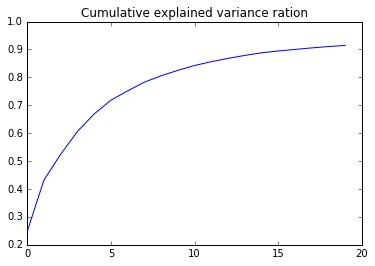

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance ration')

In [16]:
s = (pca.components_.shape[0], traj.n_residues)
modes = np.zeros(s)
for mode in range(pca.components_.shape[0]):
    modes[mode,:] = (np.sqrt((pca.components_[mode,::4].reshape(pca.components_[mode,::4].size / 3, 3)**2).sum(1)))

In [17]:
modes.shape

(20, 419)

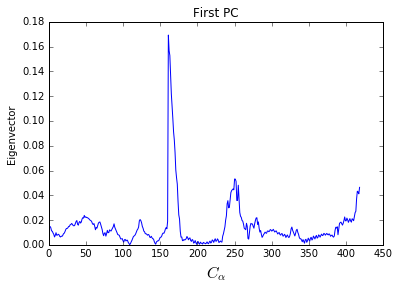

In [18]:
plt.plot(modes[1,:])
plt.title('First PC')
plt.xlabel(r'$C_\alpha$', size =16)
plt.ylabel('Eigenvector')

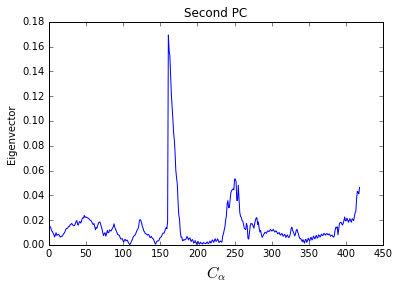

In [19]:
plt.plot(modes[1,:])
plt.title('Second PC')
plt.xlabel(r'$C_\alpha$', size =16)
plt.ylabel('Eigenvector')

In [20]:
from tqdm import tqdm

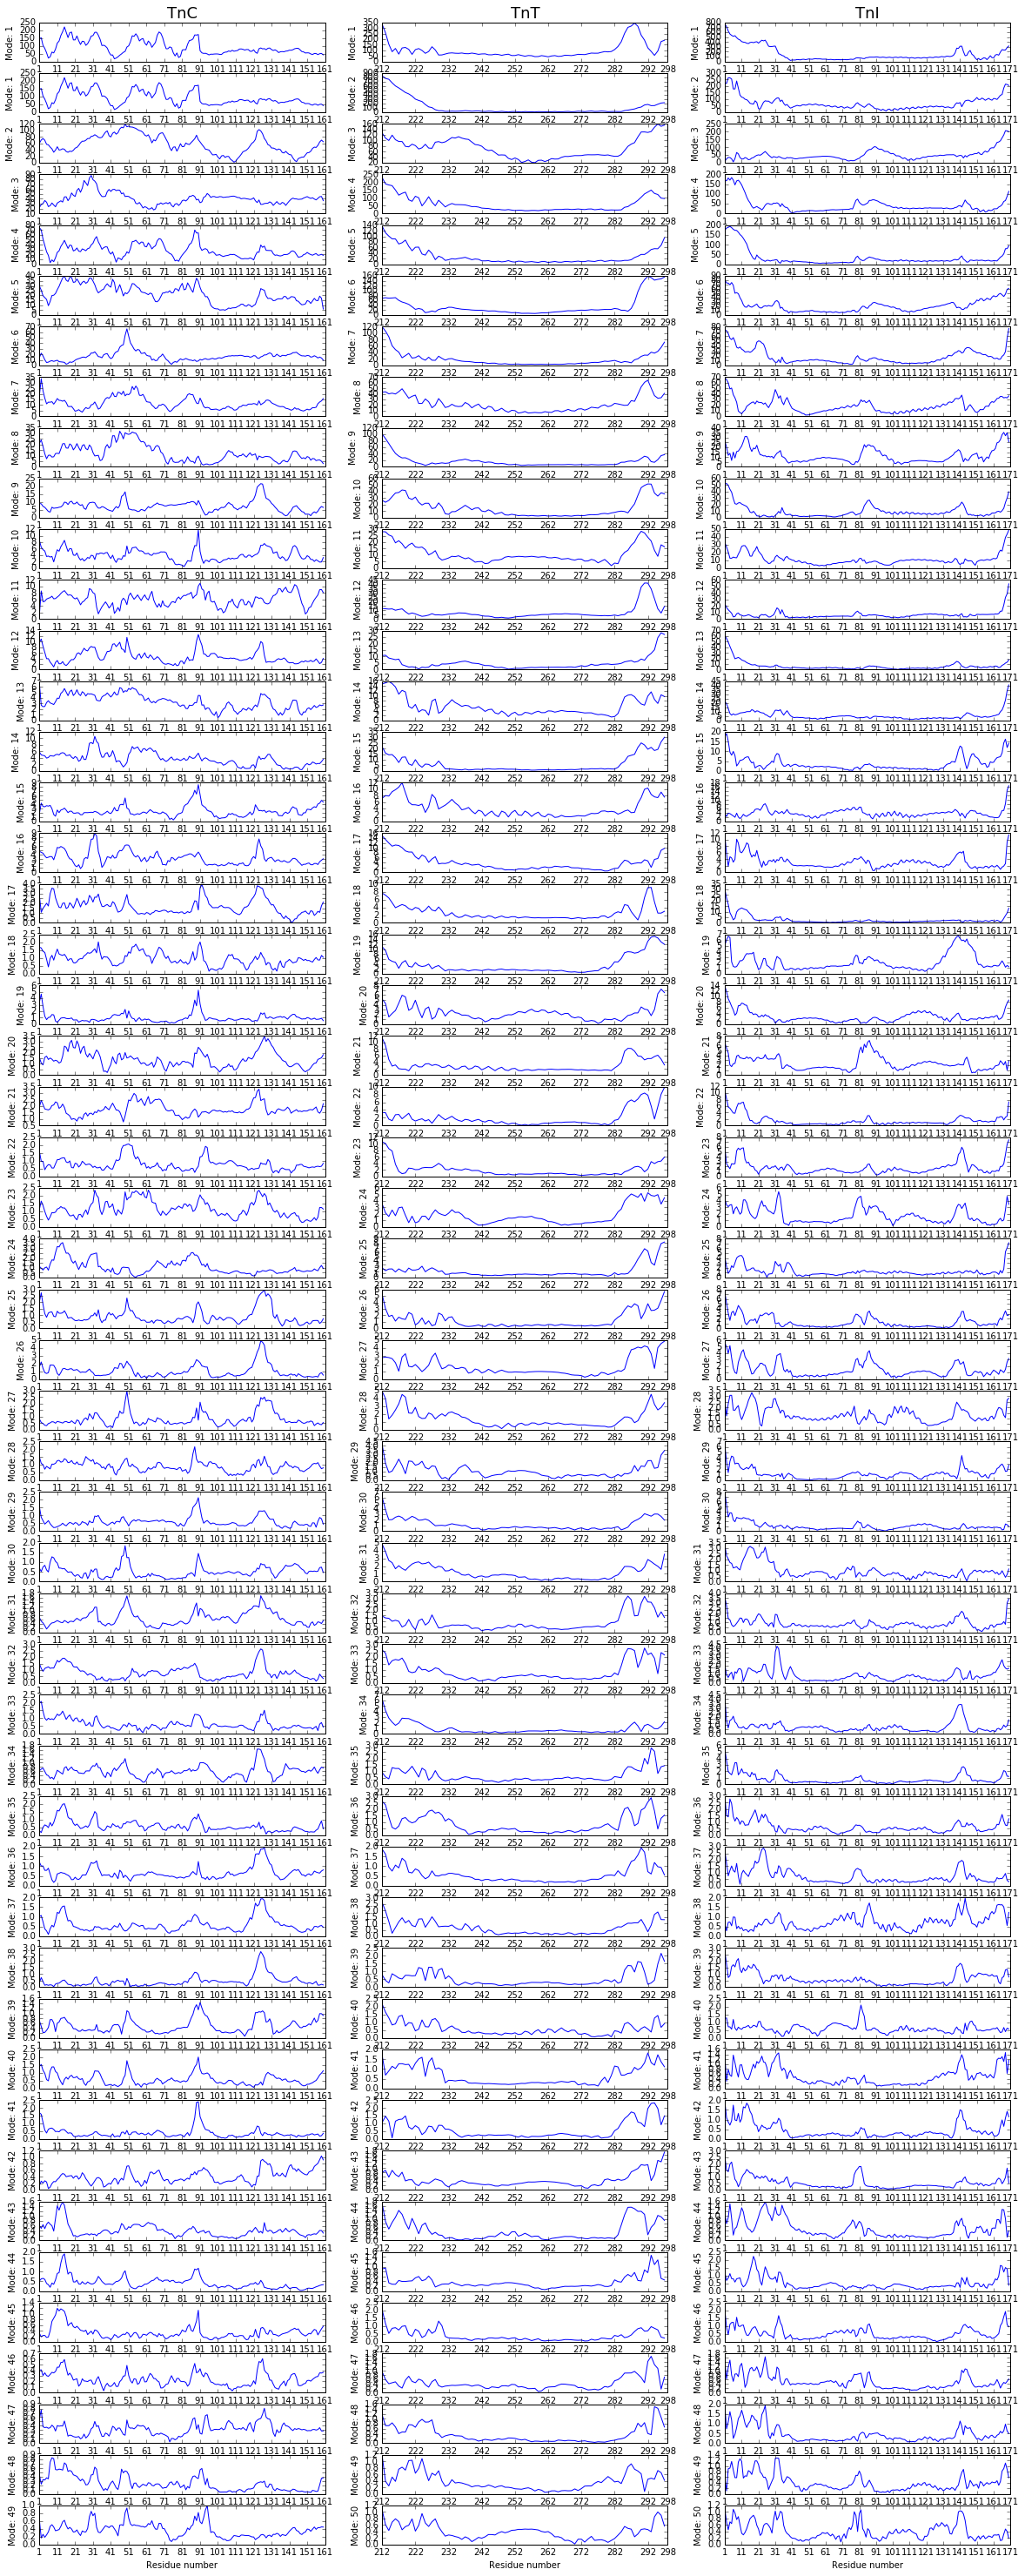

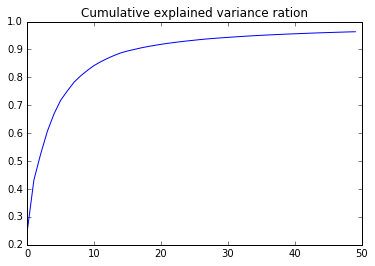

In [21]:
n_components = 50
pca = PCA(n_components)
pca_transform = pca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms*3)*10)
s = (pca.components_.shape[0], traj.n_residues)
modes = np.zeros(s)
for mode in range(pca.components_.shape[0]):
    modes[mode,:] = (np.sqrt((pca.components_[mode,::4].reshape(pca.components_[mode,::4].size / 3, 3)**2).sum(1)))
names=['TnC', 'TnT', 'TnI']*n_components
subunits = [(1, 161),(162, 248),(249, 419)]*n_components
subunits_i = [(1, 161),(212, 298),(1, 171)]*n_components
#max_value=(modes * pca.explained_variance_.max()).max()
plt.figure(figsize=(20,50))
j=0
subunits = [(1, 161),(162, 248),(249, 419)]*n_components
subunits_i = [(1, 161),(212, 298),(1, 171)]*n_components
for i in tqdm(range(len(subunits)/n_components*modes.shape[0])):
    plt.subplot(modes.shape[0], len(subunits)/n_components, i+1)
    value=modes[j,:][subunits[i][0]-1:subunits[i][1]-1] * pca.explained_variance_[j]
    plt.plot(range(subunits_i[i][0], subunits_i[i][1]), value)
    if i< 3:
        plt.title(names[i], size=18)
    plt.ylabel('Mode: %s'%str(j+1))
    plt.xlabel('Residue number')
    plt.xlim([subunits_i[i][0], subunits_i[i][1]])
    #plt.ylim([0, max_value])
    plt.xticks([x for x in range(subunits_i[i][0], subunits_i[i][1], 10)]+[subunits_i[i][1]])
    if i%3 == 0 and i>0:
        j+=1
plt.subplots_adjust(hspace=0.3, top=.93)
plt.show()
plt.title('Cumulative explained variance ratio')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [22]:
n_components = 5
pca = PCA(n_components)
pca_transform = pca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms*3)*10)
s = (pca.components_.shape[0], traj.n_residues)
modes = np.zeros(s)
for mode in range(pca.components_.shape[0]):
    modes[mode,:] = (np.sqrt((pca.components_[mode,::4].reshape(pca.components_[mode,::4].size / 3, 3)**2).sum(1)))

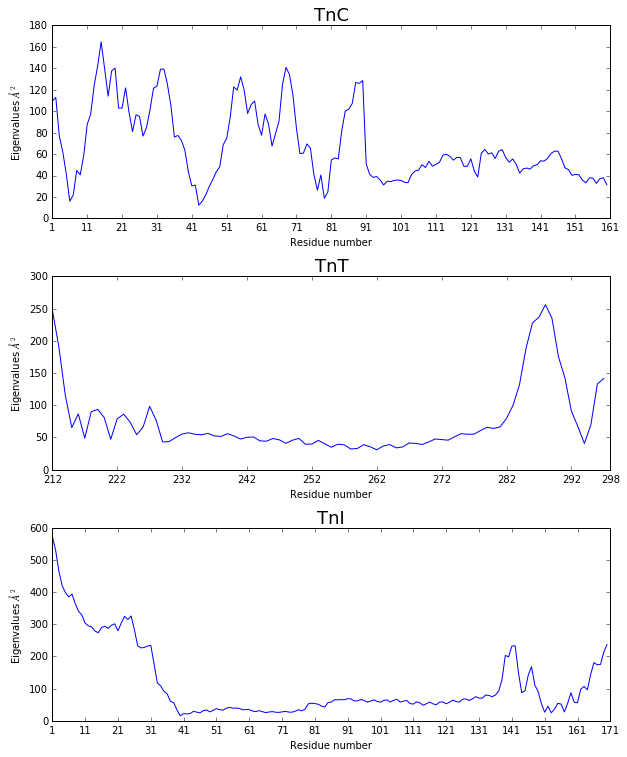

In [23]:
subunits = [(1, 161),(162, 248),(249, 419)]
subunits_i = [(1, 161),(212, 298),(1, 171)]
names=['TnC', 'TnT', 'TnI']
f, ax = plt.subplots(figsize=(10,12), nrows= len(subunits))
max_value=(modes[0,:]*pca.explained_variance_[0].max()).max()
for i in range(len(subunits)):
    value=modes[0,:][subunits[i][0]-1:subunits[i][1]-1]*pca.explained_variance_[1]
    ax[i].plot(range(subunits_i[i][0], subunits_i[i][1]), value)
    ax[i].set_title(names[i], size=18)
    ax[i].set_ylabel('Eigenvalues ${\AA}^2$')
    ax[i].set_xlabel('Residue number')
    ax[i].set_xlim([subunits_i[i][0], subunits_i[i][1]])
    #ax[i].set_ylim([0, max_value])
    ax[i].set_xticks([x for x in range(subunits_i[i][0], subunits_i[i][1], 10)]+[subunits_i[i][1]])
f.subplots_adjust(hspace=0.3, top=.93)
plt.show()

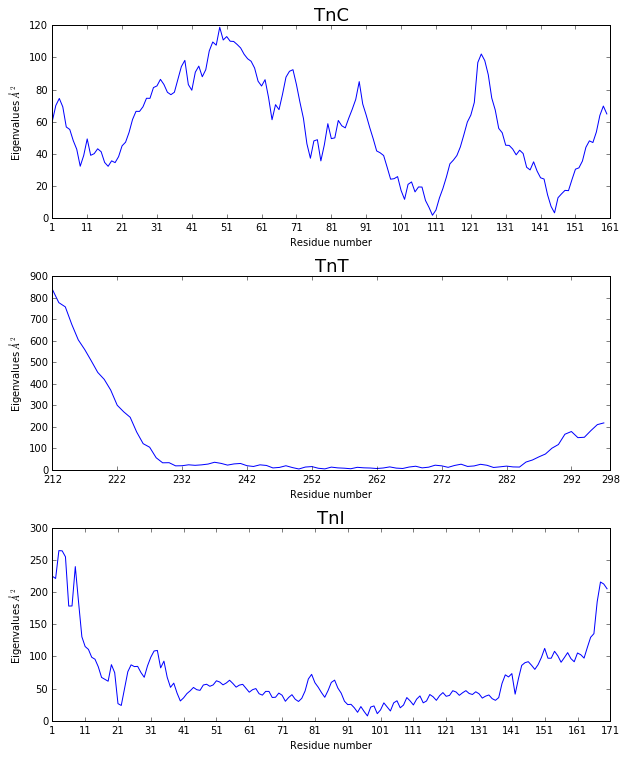

In [24]:
subunits = [(1, 161),(162, 248),(249, 419)]
subunits_i = [(1, 161),(212, 298),(1, 171)]
names=['TnC', 'TnT', 'TnI']
f, ax = plt.subplots(figsize=(10,12), nrows= len(subunits))
#max_value=mode[1,:].max()
for i in range(len(subunits)):
    value=modes[1,:][subunits[i][0]-1:subunits[i][1]-1]*pca.explained_variance_[1]
    ax[i].plot(range(subunits_i[i][0], subunits_i[i][1]), value)
    ax[i].set_title(names[i], size=18)
    ax[i].set_ylabel('Eigenvalues ${\AA}^2$')
    ax[i].set_xlabel('Residue number')
    ax[i].set_xlim([subunits_i[i][0], subunits_i[i][1]])
    #ax[i].set_ylim([0, max_value])
    ax[i].set_xticks([x for x in range(subunits_i[i][0], subunits_i[i][1], 10)]+[subunits_i[i][1]])
f.subplots_adjust(hspace=0.3, top=.93)
plt.show()

In [25]:
from scipy.stats import gaussian_kde

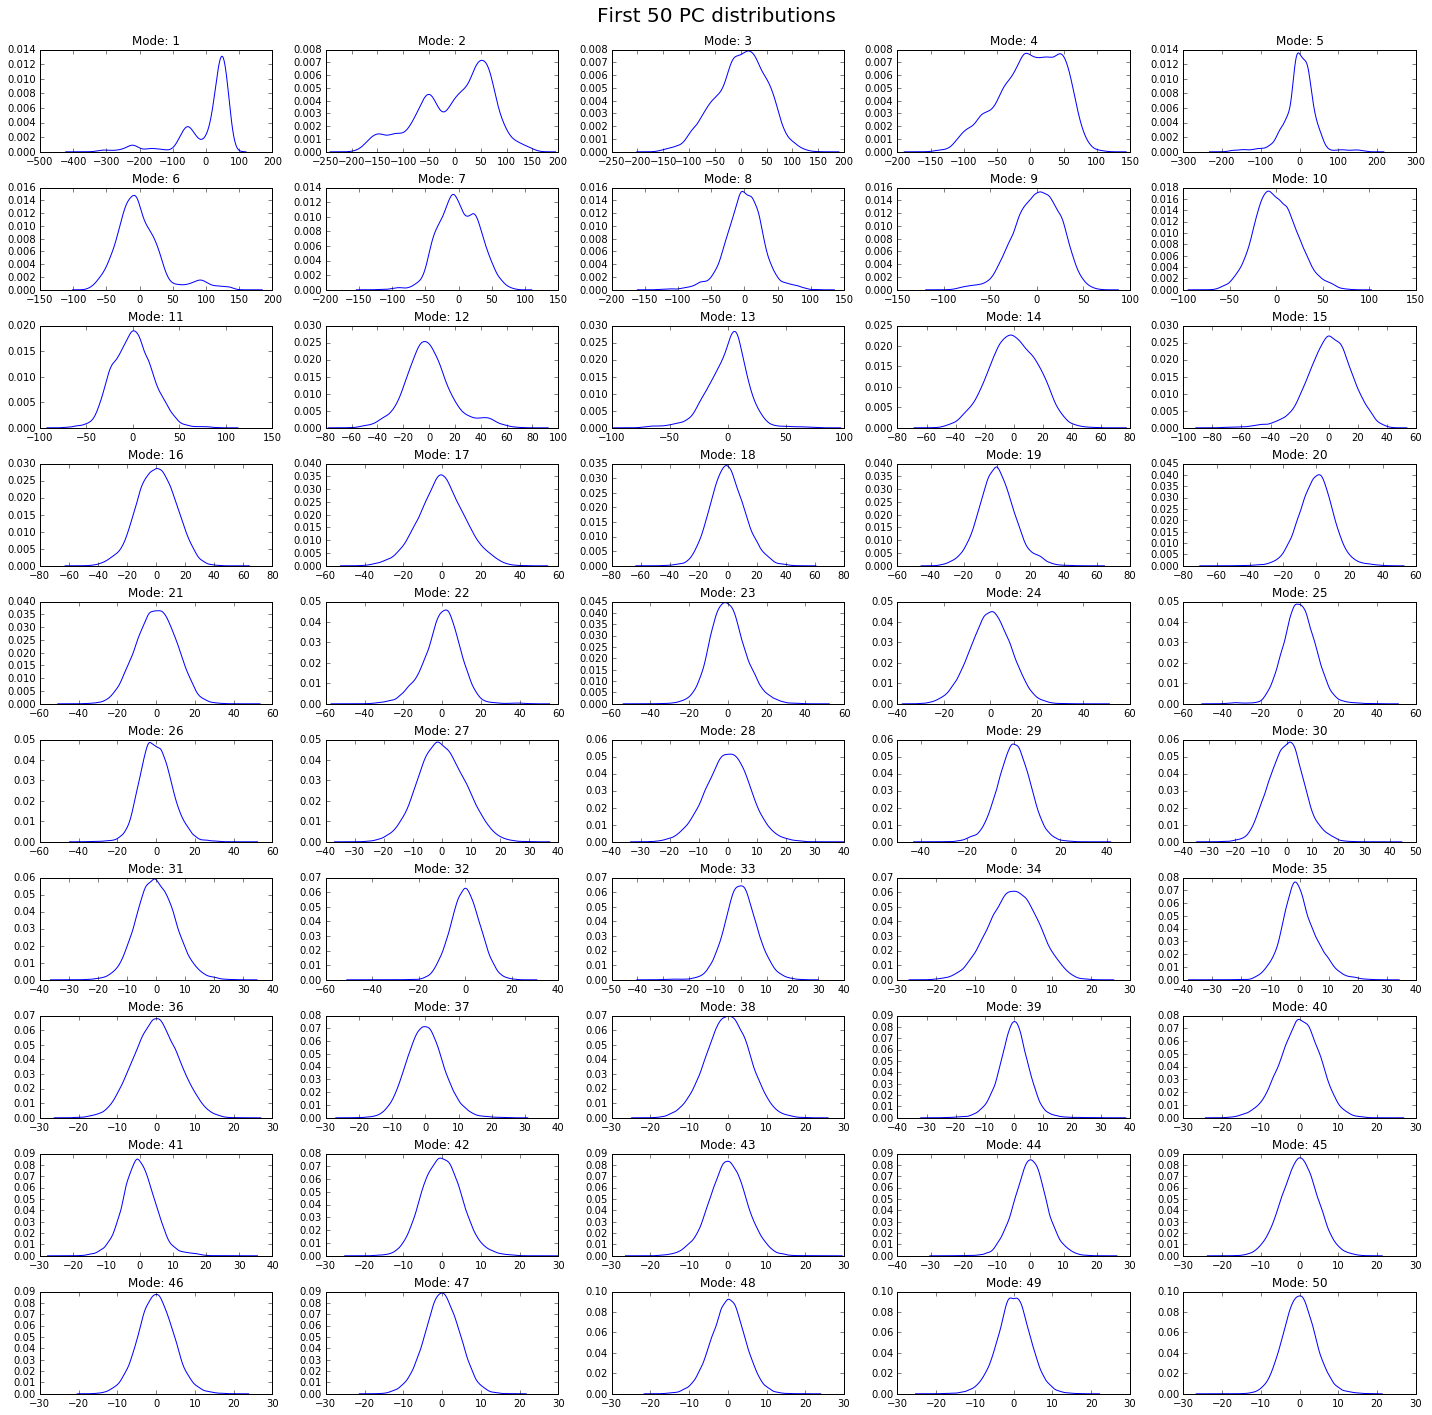

In [48]:
n_components = 50
pca = PCA(n_components)
pca_transform = pca.fit_transform(traj.xyz.reshape(traj.n_frames, traj.n_atoms*3)*10)
plt.figure(figsize=(20,20))
plt.suptitle('First 50 PC distributions',size=20)
for x in tqdm(range(pca_transform.shape[1])):
    plt.subplot(10,5,x+1)
    plt.plot(np.linspace(pca_transform[:,x].min()*1.2,pca_transform[:,x].max()*1.2,500),
         gaussian_kde(pca_transform[:,x]).evaluate(np.linspace(pca_transform[:,x].min()*1.2, 
                                                               pca_transform[:,x].max()*1.2,
                                                               500)))
    plt.title('Mode: %s' %str(x+1))
plt.tight_layout()
plt.subplots_adjust(hspace=.35, top=.95)
plt.show()